In [1]:
from unityagents import UnityEnvironment
import numpy as np
import os
import random
import torch
from collections import deque
import matplotlib.pyplot as plt
from dqn_agent import Agent

In [2]:
os.environ["CUDA_VISIBLE_DEVICES"]="1"

env = UnityEnvironment(file_name="Banana_Linux/Banana.x86_64")

## get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of actions
action_size = brain.vector_action_space_size

# examine the state space 
state = env_info.vector_observations[0]
state_size = len(state)

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


In [3]:
## define dqn
def dqn(my_agent,n_episodes=6000, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.995, training=True):
    """Deep Q-Learning.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start                    # initialize epsilon
    for i_episode in range(1, n_episodes+1):
       
        env_info = env.reset(train_mode=training)[brain_name]
        state = env_info.vector_observations[0]
        score = 0
        
        for t in range(max_t):
            
            if training:
                action = my_agent.act(state, eps) ## get an action from the agent
            else:
                action = my_agent.act(state, 0)
                
            env_info = env.step(action)[brain_name]
            (next_state,reward,done) = (env_info.vector_observations[0],env_info.rewards[0],env_info.local_done[0])
            if training:
                my_agent.step(state, action, reward, next_state, done)                     
            #next_state, reward, done, _ = env.step(action) ## advance the environment using the action
            #agent.step(state, action, reward, next_state, done) ## step forward the agent
            state = next_state
            score += reward
               
            if done:
                break 
                
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
        
        if np.mean(scores_window)>=13.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
            torch.save(my_agent.qnetwork_local.state_dict(), 'checkpoint.pth')
            break
    return scores

In [4]:
## setup my agent
my_agent = Agent(state_size=state_size, action_size=action_size, seed=0)

In [5]:
## run the agent
all_scores = dqn(my_agent)

Episode 100	Average Score: 1.15
Episode 200	Average Score: 5.15
Episode 300	Average Score: 7.89
Episode 400	Average Score: 10.92
Episode 471	Average Score: 13.04
Environment solved in 371 episodes!	Average Score: 13.04


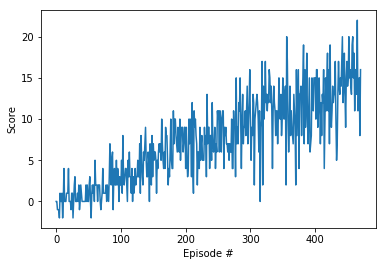

In [6]:
## graph scores here
plt.plot(all_scores)
plt.ylabel('Score')
plt.xlabel('Episode #');

In [15]:
## close up shop
env.close()

In [ ]:
## run the final version
#agent = Agent(state_size=state_size, action_size=action_size, seed=0, filename='checkpoint_dqn.pth')
#scores = dqn(agent, n_episodes=100, train=False)